In [46]:
import numpy as np
import csv
import pandas as pd
import matplotlib as mp

In [47]:
test_df=pd.DataFrame({'cik':[10,10,10,20,20,20],'date':[10,15,20,20,21,22],'close':[10,5,20,10,100,200],'revenue':[-100,10,100,1000,-10,1],'netincome':[-100,-10,10000,1000,-10,1]})
test_df

,cik,date,close,revenue,netincome
0,10,10,10,-100,-100
1,10,15,5,10,-10
2,10,20,20,100,10000
3,20,20,10,1000,1000
4,20,21,100,-10,-10
5,20,22,200,1,1


In [48]:
def get_revenue_income_and_price_change(df):
    df['cik_same_and_date_increasing']=[a and b for a,b in zip(df.cik==df.cik.shift(),df.date>df.date.shift())]
    df['revenue change']= np.where(df['cik_same_and_date_increasing'], np.sign(df.revenue)*((df.revenue-df.revenue.shift())/df.revenue.shift()).round(3),0)
    df['price change']= np.where(df['cik_same_and_date_increasing'], ((df.close-df.close.shift())/df.close.shift()).round(3),0)
    df['income change']= np.where(df['cik_same_and_date_increasing'], np.sign(df.netincome)*((df.netincome-df.netincome.shift())/df.netincome.shift()).round(3),0)
    df['income sign change']=[a for a in np.sign(df.netincome) != np.sign(df.netincome.shift())]
    df['income change']= np.where((df['income sign change'] & df['cik_same_and_date_increasing']),0.001,df['income change'])
    df['revenue sign change']=[a for a in np.sign(df.revenue) != np.sign(df.revenue.shift())]
    df['revenue change']= np.where((df['revenue sign change'] & df['cik_same_and_date_increasing']),0.001,df['revenue change'])
    # print((df.netincome-df.netincome.shift())/df.netincome.shift())
    # print(~df['cik_same_and_date_increasing'])

get_revenue_income_and_price_change(test_df)
test_df

,cik,date,close,revenue,netincome,cik_same_and_date_increasing,revenue change,price change,income change,income sign change,revenue sign change
0,10,10,10,-100,-100,False,0.000,0.0,0.000,True,True
1,10,15,5,10,-10,True,0.001,-0.5,0.900,False,True
2,10,20,20,100,10000,True,9.000,3.0,0.001,True,False
3,20,20,10,1000,1000,False,0.000,0.0,0.000,False,False
4,20,21,100,-10,-10,True,0.001,9.0,0.001,True,True
5,20,22,200,1,1,True,0.001,1.0,0.001,True,True


In [49]:
class geometric_growth_class:
    def __init__(self):
        self.value_list= []
        self.mean=0
        self.full_list=[]

    def geometric_growth(self,value,valid_cik_date,years=2,reverse=False):
        self.full_list.append(value)
        self.value_list.append(value+1)
        if not reverse:
            if len(self.value_list)>=years:
                self.mean=np.prod(self.value_list[-years:])**(1/years)-1
            else:
                self.mean=0
        else:
            # print('in the loop',years,len(self.value_list)>=years,len(self.value_list),self.value_list)
            years=years+1
            if len(self.value_list)>=years:
                self.mean=np.prod(self.value_list[-years-1:-1])**(1/(years-1))-1
            else:
                self.mean=0
        if not valid_cik_date:
            self.value_list=[]
            if not reverse:
                self.mean=0
        # print(self.mean,self.value_list,self.full_list)
        return self.mean
    
def revenue_growth_previous_years(df,years=2):
    geo=geometric_growth_class()
    revenue_growth=[round(geo.geometric_growth(rev,cik_date, years=years),3) for rev,cik_date in zip(df['revenue change'],df['cik_same_and_date_increasing'])]
    df[f'revenue growth for previous {years} years'] = revenue_growth

def income_growth_previous_years(df,years=2):
    geo=geometric_growth_class()
    income_growth=[round(geo.geometric_growth(income,cik_date, years=years),3) for income,cik_date in zip(df['income change'],df['cik_same_and_date_increasing'])]
    df[f'income growth for previous {years} years'] = income_growth

def price_growth_previous_years(df,years=2):
    geo=geometric_growth_class()
    price_growth=[round(geo.geometric_growth(price,cik_date, years=years),3) for price,cik_date in zip(df['price change'],df['cik_same_and_date_increasing'])]
    df[f'price growth for previous {years} years'] = price_growth

def price_growth_next_years(df,years=2):
    geo=geometric_growth_class()
    df_reversed=df[::-1]
    price_growth= [round(geo.geometric_growth(ret,cik_date,reverse=True,years=years),3) for ret,cik_date in zip(df_reversed['price change'],df_reversed['cik_same_and_date_increasing'])]
    df[f'price growth for next {years} years']=price_growth[::-1]

test_df=pd.DataFrame({'cik':[10,10,10,20,20,20],'date':[10,15,20,20,21,22],'close':[10,5,20,10,100,200],'revenue':[100,1000,10,1000,-10,100],'netincome':[100,1000,10000,1000,-10,1]})
get_revenue_income_and_price_change(test_df)
revenue_growth_previous_years(test_df)
income_growth_previous_years(test_df,2)
price_growth_previous_years(test_df,2)
price_growth_next_years(test_df,2)
test_df


,cik,date,close,revenue,netincome,cik_same_and_date_increasing,revenue change,price change,income change,income sign change,revenue sign change,revenue growth for previous 2 years,income growth for previous 2 years,price growth for previous 2 years,price growth for next 2 years
0,10,10,10,100,100,False,0.000,0.0,0.000,True,True,0.000,0.000,0.000,0.414
1,10,15,5,1000,1000,True,9.000,-0.5,9.000,False,False,0.000,0.000,0.000,0.000
2,10,20,20,10,10000,True,-0.990,3.0,9.000,False,False,-0.684,9.000,0.414,0.000
3,20,20,10,1000,1000,False,0.000,0.0,0.000,False,False,0.000,0.000,0.000,3.472
4,20,21,100,-10,-10,True,0.001,9.0,0.001,True,True,0.000,0.000,0.000,0.000
5,20,22,200,100,1,True,0.001,1.0,0.001,True,True,0.001,0.001,3.472,0.000


In [50]:
df=pd.read_csv('/Users/rweiss/Documents/Yfinance Code/EDGAR Fundamentals/revenueIncomePe2009-2022.csv', index_col= 0)
df=df.dropna()
df=df.sort_values(by=['ticker','date'])

years=2
get_revenue_income_and_price_change(df)
revenue_growth_previous_years(df,years)
income_growth_previous_years(df,years)
price_growth_previous_years(df,2)
price_growth_next_years(df,years)
df.head(25)

/var/folders/d3/gy3w1z7d6tz3h_16m_vrfyc5mdzrgh/T/ipykernel_97505/3106802349.py:12: RuntimeWarning: invalid value encountered in double_scalars
  self.mean=np.prod(self.value_list[-years:])**(1/years)-1


,cik,ticker,name,date,shares,netincome,revenue,pe,close,cik_same_and_date_increasing,revenue change,price change,income change,income sign change,revenue sign change,revenue growth for previous 2 years,income growth for previous 2 years,price growth for previous 2 years,price growth for next 2 years
8931,1675149,AA,Alcoa Corp,2016-12-31,183000000.0,-4.000000e+08,9.318000e+09,0.568954,28.969999,False,0.000,0.000,0.000,True,True,0.000,0.000,0.000,-0.162
10259,1675149,AA,Alcoa Corp,2017-12-31,184000000.0,2.790000e+08,1.165200e+10,0.655496,41.509998,True,0.250,0.433,0.001,True,False,0.000,0.000,0.000,-0.308
13008,1675149,AA,Alcoa Corp,2018-12-31,186000000.0,2.500000e+08,1.340300e+10,0.441443,31.809999,True,0.150,-0.234,-0.104,False,False,0.199,-0.053,0.048,0.210
15637,1675149,AA,ALCOA CORP,2019-12-31,185000000.0,-1.125000e+09,1.043300e+10,0.360850,20.350000,True,-0.222,-0.360,0.001,True,False,-0.054,-0.053,-0.300,0.512
18554,1675149,AA,ALCOA CORP,2020-12-31,186000000.0,-1.700000e+08,9.286000e+09,0.398600,19.900000,True,-0.110,-0.022,0.849,False,False,-0.168,0.360,-0.209,0.000
22356,1675149,AA,ALCOA CORP,2021-12-31,186000000.0,4.290000e+08,1.215200e+10,0.712194,46.529999,True,0.309,1.338,0.001,True,False,0.079,0.360,0.512,0.000
8824,6201,AAL,AMERICAN AIRLINES GROUP INC.,2016-12-31,552308000.0,2.584000e+09,4.014200e+10,0.638961,46.439999,False,0.000,0.000,0.000,False,False,0.000,0.000,0.000,-0.213
10671,6201,AAL,AMERICAN AIRLINES GROUP INC.,2017-12-31,489164000.0,1.282000e+09,4.262200e+10,0.579463,50.490002,True,0.062,0.087,-0.504,False,False,0.000,0.000,0.000,-0.471
14441,6201,AAL,AMERICAN AIRLINES GROUP INC.,2018-12-31,464236000.0,1.412000e+09,4.454100e+10,0.418574,40.160000,True,0.045,-0.205,0.101,False,False,0.053,-0.261,-0.070,-0.336
17206,6201,AAL,American Airlines Group Inc.,2019-12-31,443363000.0,1.686000e+09,4.576800e+10,0.278410,28.740000,True,0.028,-0.284,0.194,False,False,0.036,0.147,-0.246,-0.215


,cik,ticker,name,date,shares,netincome,revenue,pe,close,cik_same_and_date_increasing,revenue change,price change,income change,income sign change,revenue sign change,revenue growth for previous 2 years,income growth for previous 2 years,price growth for previous 2 years,price growth for next 2 years
13008,1675149,AA,Alcoa Corp,2018-12-31,186000000.0,2.500000e+08,1.340300e+10,0.441443,31.809999,True,0.150,-0.234,-0.104,False,False,0.199,-0.053,0.048,0.210
15637,1675149,AA,ALCOA CORP,2019-12-31,185000000.0,-1.125000e+09,1.043300e+10,0.360850,20.350000,True,-0.222,-0.360,0.001,True,False,-0.054,-0.053,-0.300,0.512
14441,6201,AAL,AMERICAN AIRLINES GROUP INC.,2018-12-31,464236000.0,1.412000e+09,4.454100e+10,0.418574,40.160000,True,0.045,-0.205,0.101,False,False,0.053,-0.261,-0.070,-0.336
17206,6201,AAL,American Airlines Group Inc.,2019-12-31,443363000.0,1.686000e+09,4.576800e+10,0.278410,28.740000,True,0.028,-0.284,0.194,False,False,0.036,0.147,-0.246,-0.215
4720,8177,AAME,ATLANTIC AMERICAN CORP,2013-12-31,21236000.0,1.102200e+07,1.653690e+08,0.513663,4.000000,True,0.183,0.356,1.485,False,False,0.182,0.830,0.418,-0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,1439288,ZWS,ZURN WATER SOLUTIONS CORPORATION,2016-03-31,100841000.0,6.790000e+07,1.923800e+09,0.950855,18.139999,True,-0.062,-0.342,-0.190,False,False,-0.028,0.499,-0.222,0.213
9822,1439288,ZWS,ZURN WATER SOLUTIONS CORPORATION,2017-03-31,102753000.0,7.410000e+07,1.712500e+09,1.330239,22.170000,True,-0.110,0.222,0.091,False,False,-0.086,-0.060,-0.103,0.147
12341,1439288,ZWS,ZURN WATER SOLUTIONS CORPORATION,2018-03-31,103889000.0,7.590000e+07,1.851600e+09,1.577187,28.110001,True,0.081,0.268,0.024,False,False,-0.019,0.057,0.245,0.155
14978,1439288,ZWS,ZURN WATER SOLUTIONS CORPORATION,2019-03-31,104640000.0,3.430000e+07,2.050900e+09,1.360743,26.670000,True,0.108,-0.051,-0.548,False,False,0.094,-0.320,0.097,0.146


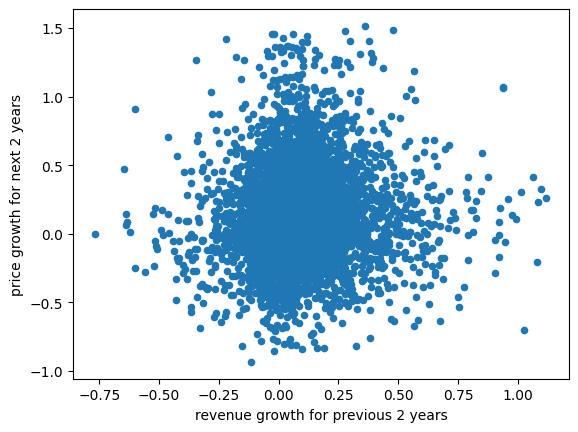

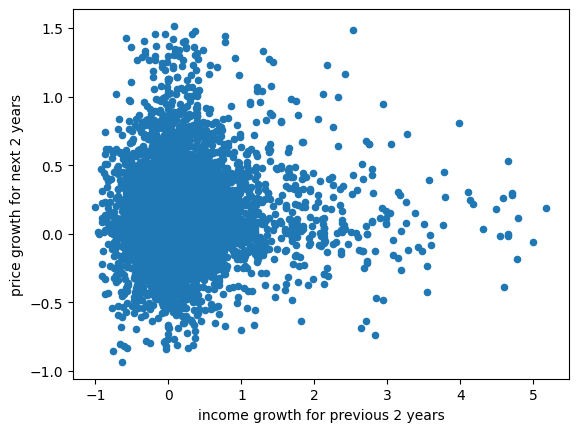

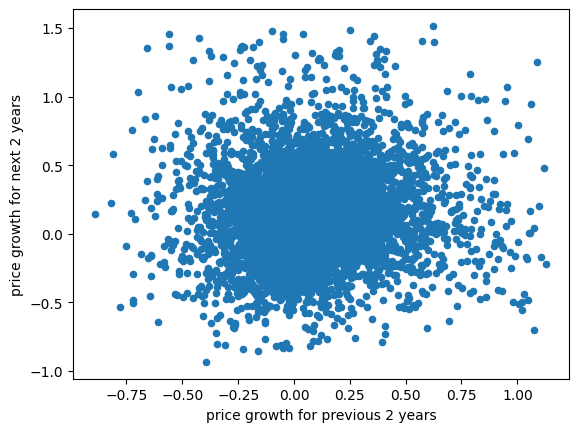

In [51]:
df=df.replace(0, np.nan).dropna()
df=df[df[f'revenue growth for previous {years} years'] < df[f'revenue growth for previous {years} years'].quantile(.995)]
df=df[df[f'price growth for next {years} years'] < df[f'price growth for next {years} years'].quantile(.995)]
df=df[df[f'income growth for previous {years} years'] < df[f'income growth for previous {years} years'].quantile(.995)]
df=df[df[f'price growth for previous {years} years'] < df[f'price growth for previous {years} years'].quantile(.995)]
df.plot(x=f'revenue growth for previous {years} years',y=f'price growth for next {years} years', kind='scatter')
df.plot(x=f'income growth for previous {years} years',y=f'price growth for next {years} years', kind='scatter')
df.plot(x=f'price growth for previous {years} years',y=f'price growth for next {years} years', kind='scatter')
df

count    6.853000e+03
mean     3.882798e+00
std      4.136642e+01
min      2.526734e-07
25%      7.289109e-01
50%      1.499761e+00
75%      3.172067e+00
max      2.862485e+03
Name: pe, dtype: float64
count    6853.000000
mean        0.080288
std         0.157006
min        -0.766000
25%         0.007000
50%         0.060000
75%         0.133000
max         1.119000
Name: revenue growth for previous 2 years, dtype: float64
count    6853.000000
mean        0.189919
std         0.570118
min        -1.000000
25%        -0.065000
50%         0.091000
75%         0.310000
max         5.179000
Name: income growth for previous 2 years, dtype: float64


<AxesSubplot: xlabel='revtimesincome', ylabel='price growth for next 2 years'>

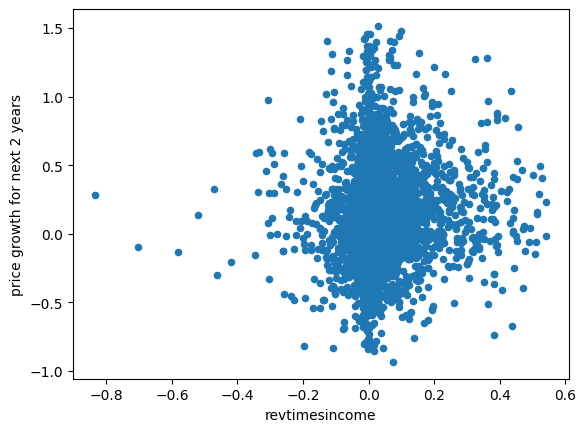

In [52]:
print(df['pe'].describe())
print(df[f'revenue growth for previous {years} years'].describe())
print(df[f'income growth for previous {years} years'].describe())

df['revtimesincome']=df[f'revenue growth for previous {years} years']*df[f'income growth for previous {years} years']
df=df[df['revtimesincome'] < df['revtimesincome'].quantile(.99)]
df.plot(x='revtimesincome',y=f'price growth for next {years} years', kind='scatter')

count    6.784000e+03
mean     3.864174e+00
std      4.155796e+01
min      2.526734e-07
25%      7.278682e-01
50%      1.495340e+00
75%      3.145985e+00
max      2.862485e+03
Name: pe, dtype: float64
count    6784.000000
mean        0.076086
std         0.149231
min        -0.766000
25%         0.007000
50%         0.059000
75%         0.129000
max         1.119000
Name: revenue growth for previous 2 years, dtype: float64
count    6784.000000
mean        0.171347
std         0.529172
min        -1.000000
25%        -0.067250
50%         0.088000
75%         0.299000
max         4.791000
Name: income growth for previous 2 years, dtype: float64


/var/folders/d3/gy3w1z7d6tz3h_16m_vrfyc5mdzrgh/T/ipykernel_97505/2886591291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revplusincome']=df[f'revenue growth for previous {years} years']+df[f'income growth for previous {years} years']


<AxesSubplot: xlabel='revplusincome', ylabel='price growth for next 2 years'>

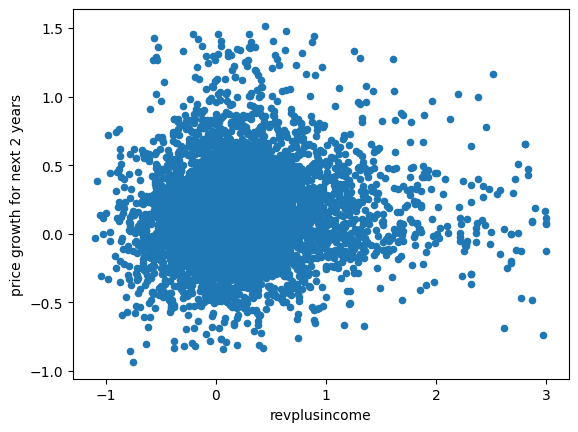

In [53]:
print(df['pe'].describe())
print(df[f'revenue growth for previous {years} years'].describe())
print(df[f'income growth for previous {years} years'].describe())

df['revplusincome']=df[f'revenue growth for previous {years} years']+df[f'income growth for previous {years} years']
df=df[df['revplusincome'] < df['revplusincome'].quantile(.995)]
df.plot(x='revplusincome',y=f'price growth for next {years} years', kind='scatter')

count    6.750000e+03
mean     3.873488e+00
std      4.166189e+01
min      2.526734e-07
25%      7.290861e-01
50%      1.497652e+00
75%      3.150139e+00
max      2.862485e+03
Name: pe, dtype: float64
count    6750.000000
mean        0.076372
std         0.149458
min        -0.766000
25%         0.007000
50%         0.059000
75%         0.129750
max         1.119000
Name: revenue growth for previous 2 years, dtype: float64
count    6750.000000
mean        0.153473
std         0.464440
min        -1.000000
25%        -0.068750
50%         0.087000
75%         0.293000
max         2.988000
Name: income growth for previous 2 years, dtype: float64


/var/folders/d3/gy3w1z7d6tz3h_16m_vrfyc5mdzrgh/T/ipykernel_97505/2476117098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revtimesrev']=np.sign(df[f'revenue growth for previous {years} years'])*df[f'revenue growth for previous {years} years']*df[f'revenue growth for previous {years} years']
/var/folders/d3/gy3w1z7d6tz3h_16m_vrfyc5mdzrgh/T/ipykernel_97505/2476117098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inctimesinc']=np.sign(df[f'income growth for previous {years} years'])*df[f'in

<AxesSubplot: xlabel='priceplusrevplusinc', ylabel='price growth for next 2 years'>

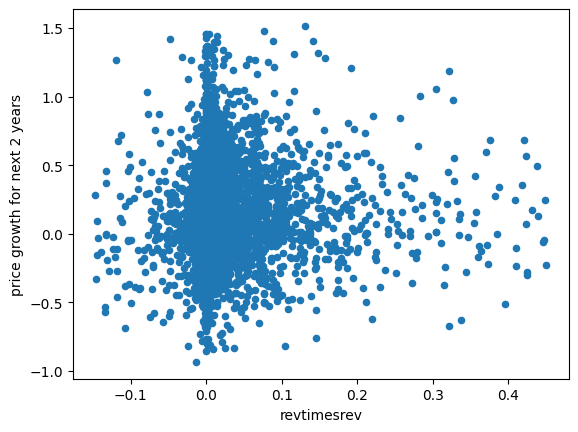

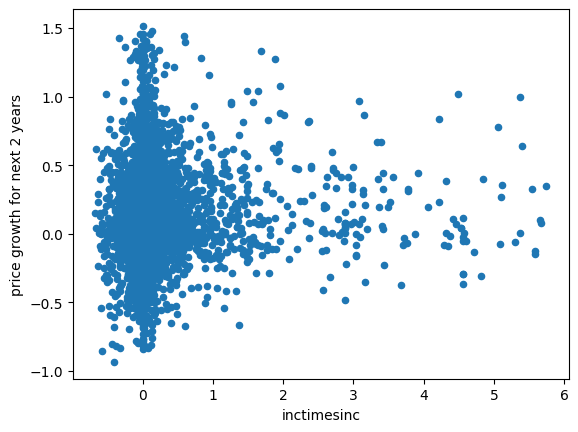

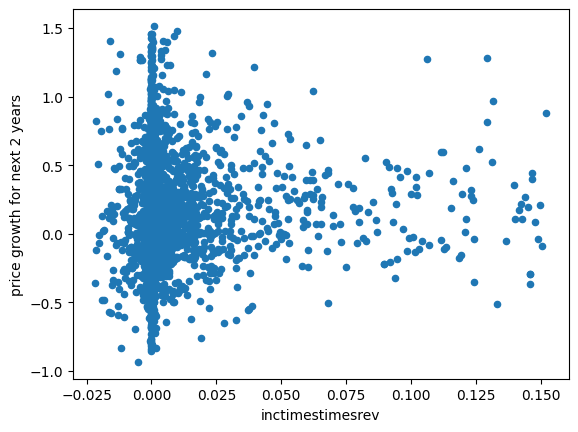

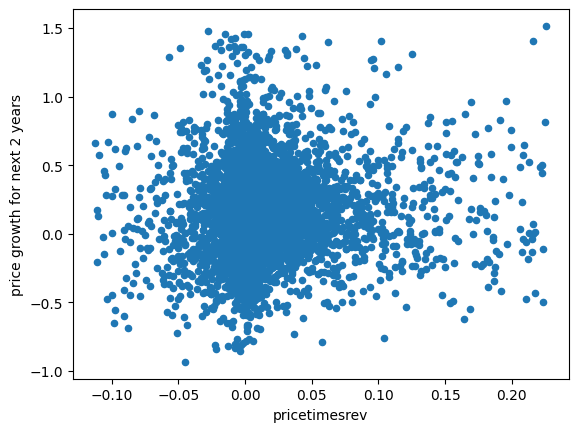

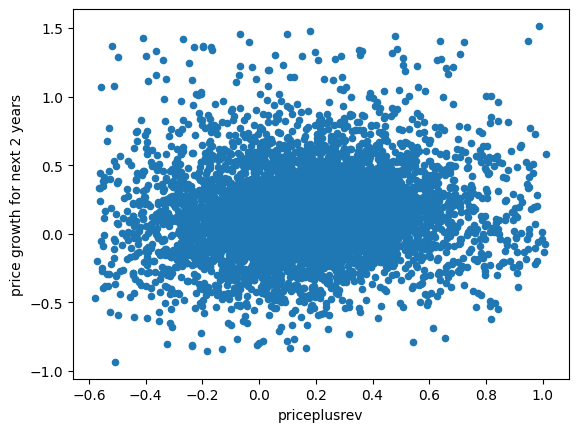

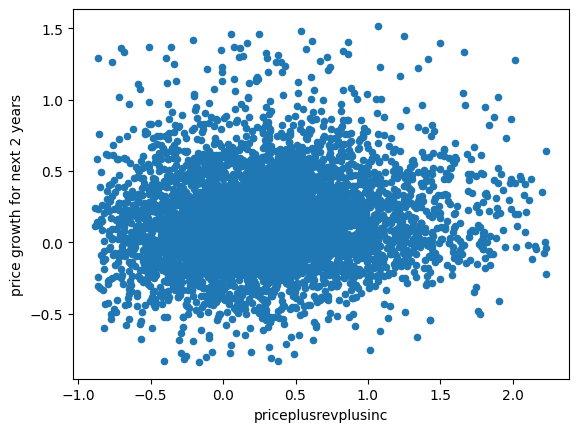

In [54]:
print(df['pe'].describe())
print(df[f'revenue growth for previous {years} years'].describe())
print(df[f'income growth for previous {years} years'].describe())

df['revtimesrev']=np.sign(df[f'revenue growth for previous {years} years'])*df[f'revenue growth for previous {years} years']*df[f'revenue growth for previous {years} years']
df['inctimesinc']=np.sign(df[f'income growth for previous {years} years'])*df[f'income growth for previous {years} years']*df[f'income growth for previous {years} years']
df['pricetimesrev']=np.sign(df[f'revenue growth for previous {years} years'])*df[f'revenue growth for previous {years} years']*df[f'price growth for previous {years} years']
df['priceplusrev']=df[f'revenue growth for previous {years} years']+df[f'price growth for previous {years} years']
df['priceplusrevplusinc']=df[f'revenue growth for previous {years} years']+df[f'price growth for previous {years} years']+df[f'income growth for previous {years} years']
df['inctimestimesrev']=np.sign(df['revtimesrev'])*df['inctimesinc']*df['revtimesrev']
df=df[df['revtimesrev'].between(df['revtimesrev'].quantile(.005),df['revtimesrev'].quantile(.995))]
df.plot(x='revtimesrev',y=f'price growth for next {years} years', kind='scatter')
df=df[df['inctimesinc'].between(df['inctimesinc'].quantile(.005),df['inctimesinc'].quantile(.995))]
df.plot(x='inctimesinc',y=f'price growth for next {years} years', kind='scatter')
df=df[df['inctimestimesrev'].between(df['inctimestimesrev'].quantile(.005),df['inctimestimesrev'].quantile(.995))]
df.plot(x='inctimestimesrev',y=f'price growth for next {years} years', kind='scatter')
df=df[df['pricetimesrev'].between(df['pricetimesrev'].quantile(.005),df['pricetimesrev'].quantile(.995))]
df.plot(x='pricetimesrev',y=f'price growth for next {years} years', kind='scatter')
df=df[df['priceplusrev'].between(df['priceplusrev'].quantile(.005),df['priceplusrev'].quantile(.995))]
df.plot(x='priceplusrev',y=f'price growth for next {years} years', kind='scatter')
df=df[df['priceplusrevplusinc'].between(df['priceplusrevplusinc'].quantile(.005),df['priceplusrevplusinc'].quantile(.995))]
df.plot(x='priceplusrevplusinc',y=f'price growth for next {years} years', kind='scatter')

1480
plain price growth 0.17658243243243243
inctimestimesrev 0.19942666666666667 150
revtimesrev 0.18347902869757174
inctimesinc 0.2024046822742475
pricetimesrev 0.0995625 96
priceplusrev 0.11839999999999999 125
priceplusrevplusinc 0.1801883116883117 154


<AxesSubplot: xlabel='pricetimesrev', ylabel='price growth for next 2 years'>

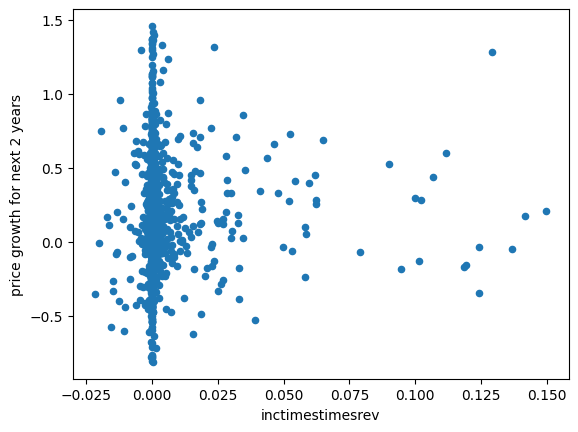

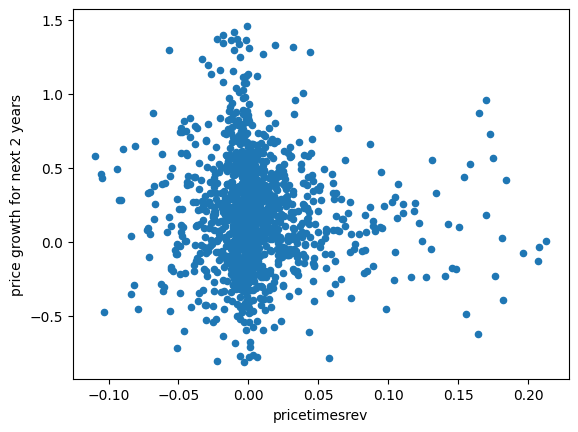

In [55]:
df2=df[df.pe<.7]
print(df2.shape[0])
print('plain price growth',df2[f'price growth for next {years} years'].mean())
print('inctimestimesrev',df2[df2.inctimestimesrev>.005][f'price growth for next {years} years'].mean(), len(df2[df2.inctimestimesrev>.005][f'price growth for next {years} years'].index))
print('revtimesrev',df2[df2.revtimesrev>.01][f'price growth for next {years} years'].mean())
print('inctimesinc',df2[df2.inctimesinc>.01][f'price growth for next {years} years'].mean())
# print(df2[df2.revtimesincome>.01][f'price growth for next {years} years'].mean())
threshold=.05
threshold1=.5
threshold2=.9
print('pricetimesrev',df2[df2.pricetimesrev>threshold][f'price growth for next {years} years'].mean(), len(df2[df2.pricetimesrev>threshold]))
print('priceplusrev',df2[df2.priceplusrev>threshold1][f'price growth for next {years} years'].mean(), len(df2[df2.priceplusrev>threshold1]))
print('priceplusrevplusinc',df2[df2.priceplusrevplusinc>threshold2][f'price growth for next {years} years'].mean(), len(df2[df2.priceplusrevplusinc>threshold2]))
df2.plot(x='inctimestimesrev',y=f'price growth for next {years} years', kind='scatter')
df2.plot(x='pricetimesrev',y=f'price growth for next {years} years', kind='scatter')

In [66]:
df.head()
df3=df.reset_index(drop=True)
df3=df3.drop(['cik_same_and_date_increasing','revenue change','price change','income change','income sign change','revenue sign change'], axis=1)
# df3.rename(columns={f'revenue_grow_prev_{years}_y', f'income_grow_prev_{years}_y', f'price_grow_prev_{years}_y', f'price_grow_subseq_{years}_y'})
df3.to_csv('preprocessed_df.csv')
